In [1]:
# Main libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings                    
warnings.filterwarnings("ignore") 

In [2]:
#import data
loan_data = pd.read_csv('Python_Credit_Risk_XTrain_qxvwcf.csv')
loan_data.head(n=10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [4]:
loan_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [5]:
# Deal with Missing value
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Deal with missing catagory value using mode 
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0])

In [7]:
# deal with missing numerical value using mean
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean())
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean())

In [8]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### DATA VISULIZATION 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

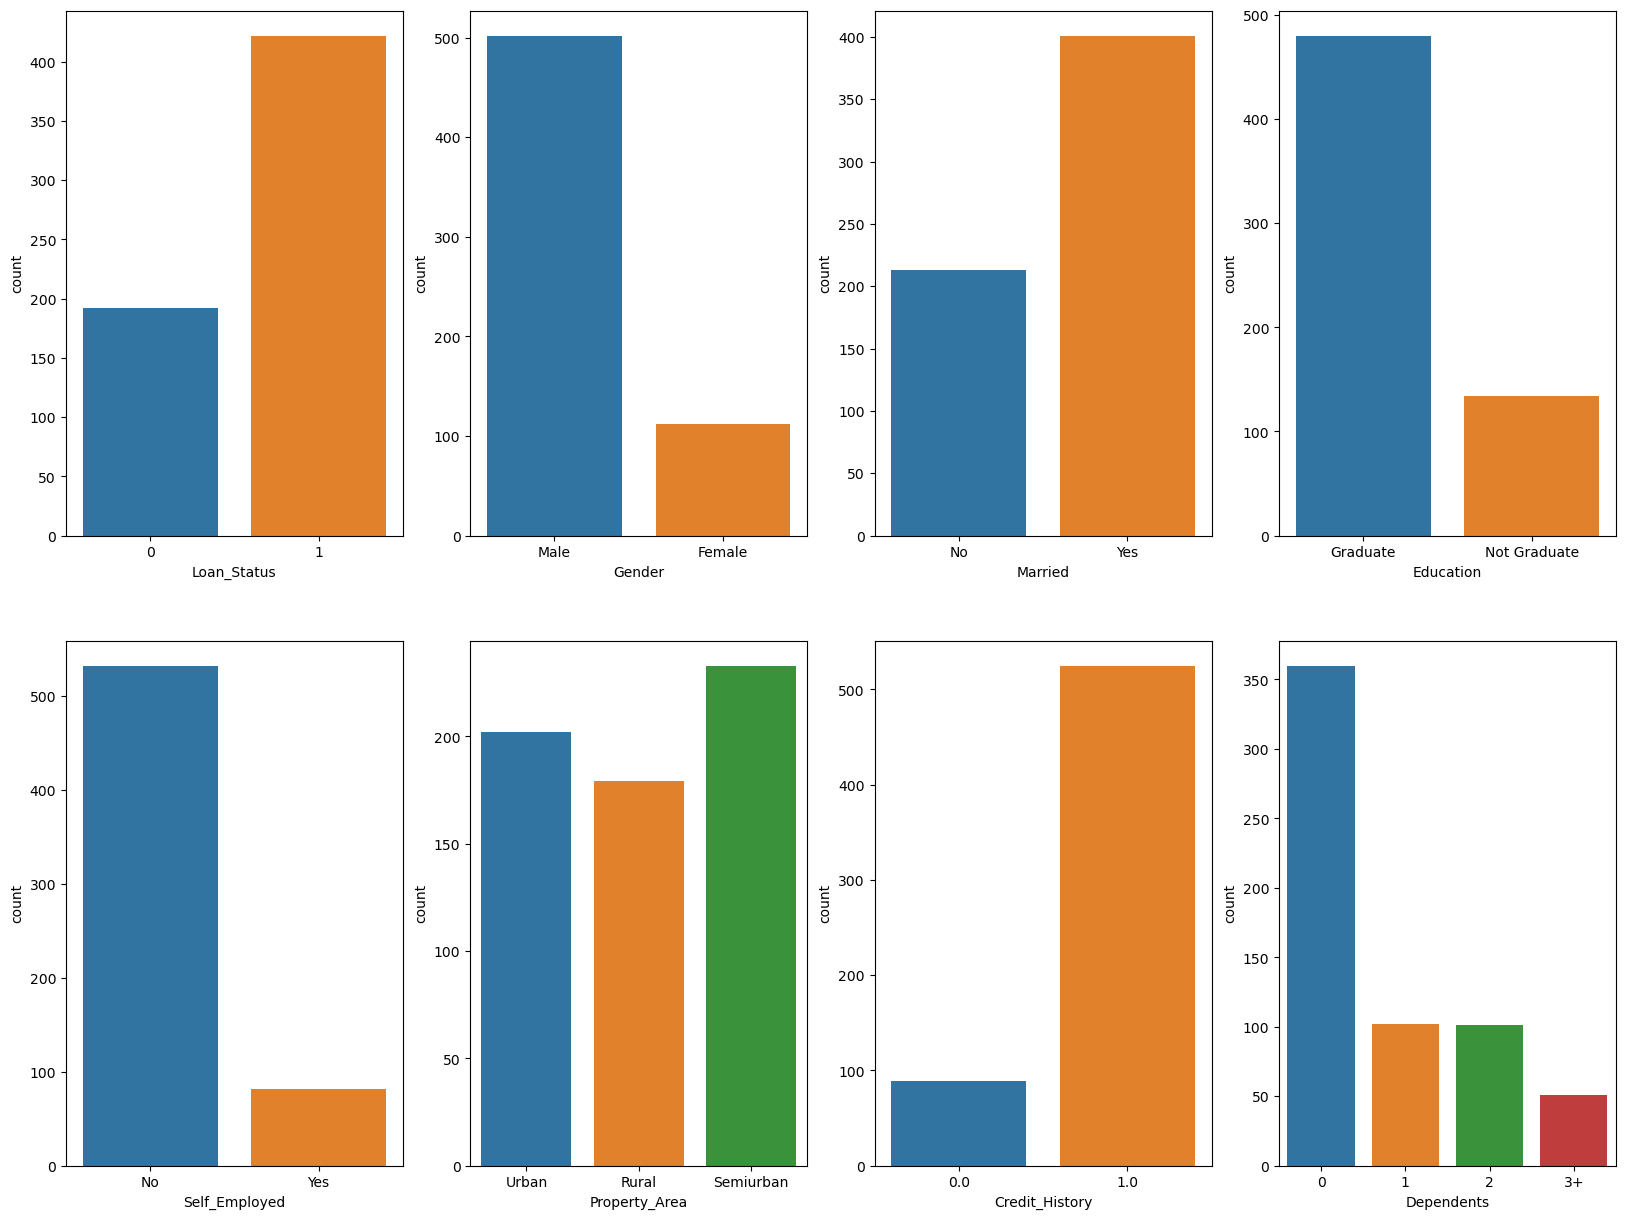

In [9]:
# Bar Graph
fig,ax = plt.subplots(2,4,figsize=(20,15))
sns.countplot(x='Loan_Status', data = loan_data, ax=ax[0][0])
sns.countplot(x='Gender', data = loan_data, ax=ax[0][1])
sns.countplot(x='Married', data = loan_data, ax=ax[0][2])
sns.countplot(x='Education', data = loan_data, ax=ax[0][3])
sns.countplot(x='Self_Employed', data = loan_data, ax=ax[1][0])
sns.countplot(x='Property_Area', data = loan_data, ax=ax[1][1])
sns.countplot(x='Credit_History', data = loan_data, ax=ax[1][2])
sns.countplot(x='Dependents', data = loan_data, ax=ax[1][3])

 After Data Cleaning proceed for Data visualization.
 
 1)In this Male is more than Female.
 
 2)Most of them are Graduated & Married.
 
 3)If you talk about Employment most of are Unemployment.
 
 4)In property area most of people are from Semiurban.
 
 5) loan Approve is more than Loan Rejected.
 
 6) dependents=0 maximum of loan application count.

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

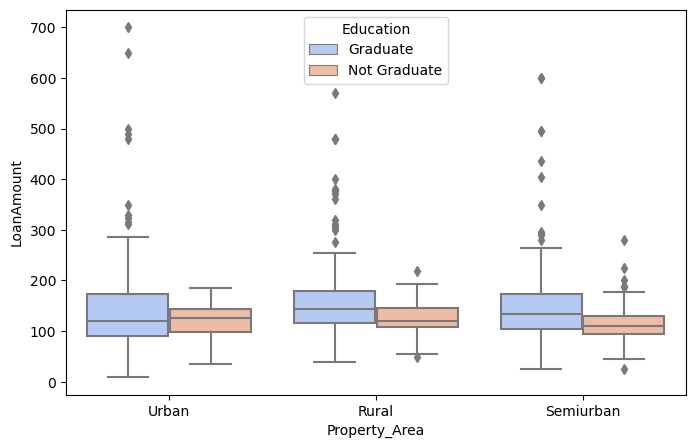

In [10]:
# Box PLOT ( outlier tretement)
plt.figure(figsize=(8,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=loan_data, palette="coolwarm")

In this Box plot we can say

1)In Most of Graduate People take more loan than non gradute in Rural & Semiurban.
    
2)But in Urban Area its chance to Non graduated take more loan than Graduated one.

<AxesSubplot:xlabel='Credit_History'>

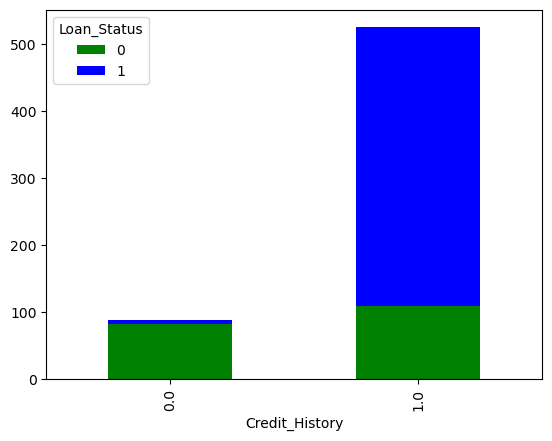

In [11]:
lc = pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])
lc.plot(kind='bar',stacked=True, color=['green','blue'], grid=False)

In ths BarGraph we can assume

1)Loan Status has good correlation with CreditHistory.

2)A good credithistory can make a chance to take loan.

3)low credit history are in range between (0-100).

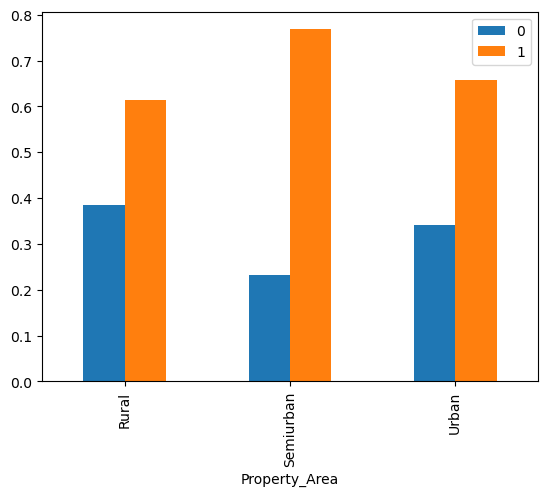

In [12]:
loan=pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status'])
loan.div(loan.sum(1).astype(float),axis=0).plot.bar()
plt.legend()

In [14]:
# Creat a new Column
loan_data['Total_Income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis='columns', inplace=True)

In [15]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,1,6000.0


In [16]:
# Convert Categorical Data to Numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Object= loan_data.select_dtypes(include='object').columns

for feature in Object:
    loan_data[feature] = le.fit_transform(loan_data[feature].astype(str))

print(loan_data.info())
loan_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    int32  
 1   Gender            614 non-null    int32  
 2   Married           614 non-null    int32  
 3   Dependents        614 non-null    int32  
 4   Education         614 non-null    int32  
 5   Self_Employed     614 non-null    int32  
 6   LoanAmount        614 non-null    float64
 7   Loan_Amount_Term  614 non-null    float64
 8   Credit_History    614 non-null    float64
 9   Property_Area     614 non-null    int32  
 10  Loan_Status       614 non-null    int64  
 11  Total_Income      614 non-null    float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0


In [17]:
# Drop unnecessary Column
data = loan_data.drop(['Loan_ID'],axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0


## Model Buliding 

In [19]:
# Split the data set to train & test 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = loan_data.drop('Loan_Status',axis = 1)
y = loan_data['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.2 ,random_state =102)

In [20]:
# import logistic regression from scikit learn
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train , y_train)
y_pred = lg.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
acc

85.36585365853658

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
acc

86.99186991869918

<AxesSubplot:>

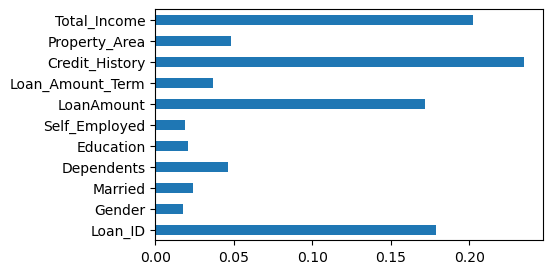

In [24]:
# see the which feature is import which are not using randomforestclassifier
plt.figure(figsize=(5,3))
(pd.Series(rfc.feature_importances_, index=X_train.columns).plot(kind='barh'))

# CONCLUSION 

1)There's a positive relationship between Total Income & loan amount.

2)There's also a positive relationship between credit history and loan status.

3)On average, men got more loans. Being married & educated (graduate) were also factors that resulted in loan approvals.

